In [201]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# H2O overview

## useful links:
* Tutorials: https://github.com/h2oai/h2o-tutorials
* H2O.ai (all products) documentation: http://docs.h2o.ai/ 
* Base H2O documentation http://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html
* Sparkling water documentation: http://docs.h2o.ai/sparkling-water/2.3/latest-stable/doc/index.html
* H2O4GPU (still in alpha): https://github.com/h2oai/h2o4gpu/blob/master/README.md

Company line: "H2O is an open source, in-memory, distributed, fast, and scalable machine learning and predictive analytics platform that allows you to build machine learning models on big data and provides easy productionalization of those models in an enterprise environment."

### My take: Big data version of scikit-learn + pandas (sort of)

* written in java
* APIs for python, R, and Flow 

### ML algoritms (availabile in h2o.estimators):
* Gradient Boosting Machine
* Distributed Random Forest
* Deep Learning -> (Feed forward multi-layer perceptron)
* KMeans
* Generalized Linear Estimator
* PCA
* Word2Vec
* ...
* No support for SVMs, RNNs, CNNs, ...

### Fun stuff
* Grid search (for hyperparameter optimization)
* AutoML (automatic model selection)

### Installing H2O
#### Simple python client installation (one machine):
* `pip install h2o`
* Dependencies (should get installed when you run the above command): requests, tabulate, scikit-learn, colorama, future

#### H2O on Hadoop installation:
* complete steps here: http://h2o-release.s3.amazonaws.com/h2o/rel-wright/3/index.html
* Hortonworks example:

`wget http://h2o-release.s3.amazonaws.com/h2o/rel-wright/3/h2o-3.20.0.3-hdp2.6.zip`

`unzip h2o-3.20.0.3-hdp2.6.zip`

`cd h2o-3.20.0.3-hdp2.6`

`/usr/bin/hadoop jar /home/sshuser/h2o-3.21.0.3-hdp2.6/h2odriver.jar -nodes 8 -mapperXmx 80g`
# Let's start H2O!

In [117]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_171"; OpenJDK Runtime Environment (build 1.8.0_171-8u171-b11-0ubuntu0.17.10.1-b11); OpenJDK 64-Bit Server VM (build 25.171-b11, mixed mode)
  Starting server from /usr/local/lib/python2.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpj5iDzH
  JVM stdout: /tmp/tmpj5iDzH/h2o_sshuser_started_from_python.out
  JVM stderr: /tmp/tmpj5iDzH/h2o_sshuser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,17 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.2
H2O cluster version age:,1 month and 10 days
H2O cluster name:,H2O_from_python_sshuser_p8eh7w
H2O cluster total nodes:,1
H2O cluster free memory:,26.67 Gb
H2O cluster total cores:,32
H2O cluster allowed cores:,32
H2O cluster status:,"accepting new members, healthy"


In [118]:
## You can run h2o.init() as many time as you'd like
## you can also get the cluster information by doing
h2o.cluster().show_status()

H2O cluster uptime:,17 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.2
H2O cluster version age:,1 month and 10 days
H2O cluster name:,H2O_from_python_sshuser_p8eh7w
H2O cluster total nodes:,1
H2O cluster free memory:,26.67 Gb
H2O cluster total cores:,32
H2O cluster allowed cores:,32
H2O cluster status:,"accepting new members, healthy"


In [121]:
## There are a number of useful methods associated with h2o.cluster()
## shutdown the cluster:
h2o.cluster().shutdown()

In [122]:
## if you want to connect to h2o running on a hadoop cluster, you must specify the 
## ip of the head node as an argument like so: h2o.init(ip='10.0.0.4')

## can specify cluster memory by h2o.init(min_mem_size='100G')
## neat trick to get maximum amount of memory available:

import psutil
h2o.init(min_mem_size=psutil.virtual_memory().free)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_171"; OpenJDK Runtime Environment (build 1.8.0_171-8u171-b11-0ubuntu0.17.10.1-b11); OpenJDK 64-Bit Server VM (build 25.171-b11, mixed mode)
  Starting server from /usr/local/lib/python2.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpmPtKx2
  JVM stdout: /tmp/tmpmPtKx2/h2o_sshuser_started_from_python.out
  JVM stderr: /tmp/tmpmPtKx2/h2o_sshuser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,17 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.2
H2O cluster version age:,1 month and 10 days
H2O cluster name:,H2O_from_python_sshuser_iue0vn
H2O cluster total nodes:,1
H2O cluster free memory:,239.2 Gb
H2O cluster total cores:,32
H2O cluster allowed cores:,32
H2O cluster status:,"accepting new members, healthy"


## Load data and do some simple operations

### CERN open data from 2010 Run of LHC
### Small sample of events with exactly two muons

In [315]:
hdf = h2o.import_file("http://opendata.cern.ch/record/700/files/MuRun2010B.csv")


## path must be accesable to all nodes in cluster
## if a local file and your running a hadoop cluster
## either copy to hdfs or (slow) use h2o.upload_file instead

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [148]:
## get dimensions of dataframe
hdf.shape

(100000, 21)

In [149]:
## display first 10 rows
hdf.head()

Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
146436,9.08308e+07,G,19.1712,3.81713,9.04323,-16.4673,9.81583,-1.28942,1.17139,1,T,5.43984,-0.362592,2.62699,-4.74849,2.65189,-1.34587,1.70796,1,2.73205
146436,9.08622e+07,G,12.9435,5.12579,-3.98369,-11.1973,6.4918,-1.31335,-0.660674,-1,G,11.8636,4.78984,-6.26222,-8.86434,7.88403,-0.966622,-0.917841,1,3.10256
146436,9.06448e+07,G,12.3999,-0.849742,9.4011,8.04015,9.43943,0.77258,1.66094,1,G,8.55532,-4.85155,6.97696,-0.983229,8.49797,-0.115445,2.17841,-1,9.41149
146436,9.06786e+07,G,17.8132,-1.95959,2.80531,17.4811,3.42195,2.3335,2.18053,1,G,9.42174,4.36523,0.168017,8.34713,4.36846,1.403,0.0384708,1,7.74702
146436,9.06867e+07,G,7.95664,7.097,-1.31646,3.34613,7.21806,0.448399,-0.183411,1,T,5.44467,-1.34176,1.38647,5.09025,1.92941,1.69738,2.33981,-1,8.67727
146436,9.06925e+07,G,11.3415,0.816445,4.98596,10.1534,5.05236,1.44794,1.40849,1,G,7.86621,0.602823,5.05381,5.99681,5.08964,1.00197,1.45208,-1,2.30104
146436,9.07255e+07,G,18.1293,9.77963,7.17648,13.4728,12.1303,0.957512,0.633065,-1,T,4.48788,-1.39991,0.374027,4.24621,1.44902,1.79621,2.88051,1,8.38705
146436,9.07496e+07,G,15.8762,1.5928,3.01336,15.5057,3.40842,2.21997,1.08455,-1,G,7.74866,-1.91338,2.42923,7.10411,3.09228,1.56923,2.23796,1,4.14828
146436,9.08084e+07,G,8.99267,-1.6444,-4.20646,7.77551,4.51646,1.31172,-1.94345,1,G,6.45454,0.860784,-4.41161,4.63105,4.4948,0.902647,-1.3781,-1,3.1318
146436,9.08519e+07,G,10.4195,-3.61903,-2.36646,-9.47933,4.32406,-1.52644,-2.56249,1,G,25.6473,11.7951,-17.8219,14.1785,21.3716,0.622447,-0.986147,-1,28.3605


In [150]:
#show columns
hdf.columns

[u'Run',
 u'Event',
 u'Type1',
 u'E1',
 u'px1 ',
 u'py1',
 u'pz1',
 u'pt1',
 u'eta1',
 u'phi1',
 u'Q1',
 u'Type2',
 u'E2',
 u'px2',
 u'py2',
 u'pz2',
 u'pt2',
 u'eta2',
 u'phi2',
 u'Q2',
 u'M']

In [151]:
## column rename
hdf.set_name(u'px1 ', u'px1')

### The Z boson has a mass of around 90 GeV, is neutral, and decays to two muons

<img src="feynman.png">

In [152]:
## applying masks works like pandas
oppo_sign = hdf[hdf['Q1']!=hdf['Q2']]
same_sign = hdf[hdf['Q1']==hdf['Q2']]

Text(0.5,0,'Dimuon mass (GeV)')

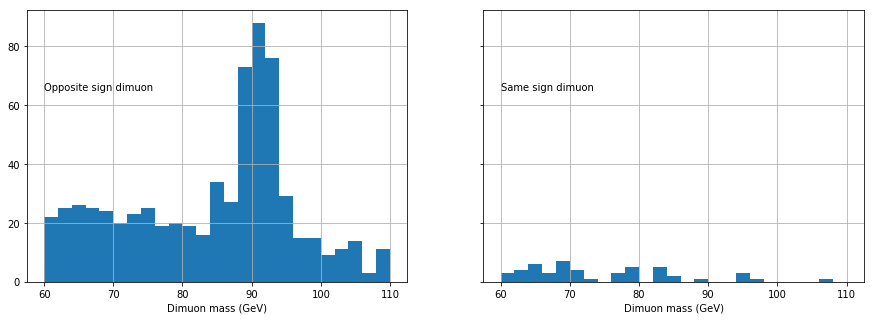

In [314]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey='all',figsize=(15,5))

oppo_sign.as_data_frame()['M'].hist(ax=ax1, bins=range(60,111,2))
same_sign.as_data_frame()['M'].hist(ax=ax2, bins=range(60,111,2))


ax1.text(60,65,"Opposite sign dimuon")
ax1.set_xlabel("Dimuon mass (GeV)")



ax2.text(60,65,"Same sign dimuon")
ax2.set_xlabel("Dimuon mass (GeV)")


In [179]:
def compute_mass(x):
    
    ## p = sqrt(x^2+y^2+z^2)
    p_total = ( 
        (x['px1']+x['px2'])**2+
        (x['py1']+x['py2'])**2+ 
        (x['pz1']+x['pz2'])**2
    )**0.5
    
    return p_total

## apply statement is not as nice as pandas :(
hdf['mass_squared'] = hdf.apply(lambda x: (x['E1']+x['E2'])*(x['E1']+x['E2'])-
                                (x['px1']+x['px2'])*(x['px1']+x['px2'])+
                                (x['py1']+x['py2'])*(x['py1']+x['py2'])+ 
                                (x['pz1']+x['pz2'])*(x['pz1']+x['pz2']),
                                axis=1)

hdf['mass'] = hdf['mass_squared']**0.5

In [216]:
hdf.group_by('Run').mean(['Q1','Q2','M']).get_frame()

Run,mean_M,mean_Q2,mean_Q1
146428,9.37335,-0.132867,0.0769231
146430,10.5183,-0.116279,-0.0166113
146436,11.1779,0.00627178,0.00766551
146437,11.3957,-0.0241423,-0.00889454
146511,9.52288,-0.0302222,0.0386667
146514,9.62239,-0.0111248,0.0197775
146589,9.51422,0.00374532,0.0337079
146644,9.8562,0.00368601,0.0315358
146710,9.51596,0.0134745,0.00288739
146713,10.2567,0.0053135,0.0159405


## Build a model

$ M^2 = (E_1+E_2)^2 - \left|\left|\vec{p_1}+\vec{p_2}\right|\right|^2$

In [217]:
## import the models
from h2o.estimators.glm import H2OGeneralizedLinearEstimator 
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.deeplearning import H2ODeepLearningEstimator 


In [241]:
glm = H2OGeneralizedLinearEstimator()
dl = H2ODeepLearningEstimator()
gbm = H2OGradientBoostingEstimator()

In [219]:
predictors = ['px1','py1','pz1','px2','py2','pz2','E1','E2']

In [ ]:
train, test = hdf.split_frame([0.7])

In [240]:
glm.train(x=predictors, y='M', training_frame=train, validation_frame=test)
glm.r2(valid=True)

glm Model Build progress: |███████████████████████████████████████████████| 100%


-0.7682343845053332

In [242]:
dl.train(x=predictors, y='M', training_frame=train, validation_frame=test)
dl.r2(valid=True)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


0.7589307169013615

In [243]:
gbm.train(x=predictors, y='M', training_frame=train, validation_frame=test)
gbm.r2(valid=True)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


0.9034281239608016

In [246]:
test['M'].cbind( gbm.predict(test) )

gbm prediction progress: |████████████████████████████████████████████████| 100%


M,predict
28.3605,24.6066
6.79063,6.88675
9.97321,7.49742
7.98031,5.56148
9.56971,10.6131
3.19125,4.91168
4.8285,6.37986
3.22257,5.04561
2.30013,4.39428
3.10956,5.81453


In [249]:
gbm_big = H2OGradientBoostingEstimator(ntrees=200, max_depth=12)
gbm_big.train(x=predictors, y='M', training_frame=train, validation_frame=test)
gbm.r2(valid=True)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


0.9034281239608016

## H2O Flow (localhost:54321)
### if running remotely, you must tunnel the port
`ssh -L 54321:localhost:54321 username@hostname.com`

## Model selection: Grid search + AutoML

https://github.com/h2oai/h2o-tutorials/blob/fa38a7fc42d2265356942aa9f8bd0a07244a4033/training/gbm_deep_dive/python/gbmTuning.ipynb

In [255]:
from h2o.grid.grid_search import H2OGridSearch

In [311]:
hyper_params = {'max_depth': range(2,21,2),
                'sample_rate': [x/100. for x in range(20, 101)],
                'col_sample_rate': [x/100. for x in range(20, 101)],
                'histogram_type': ["UniformAdaptive", "QuantilesGlobal"],
                'ntrees': range(20,201,20)
               }
search_criteria= { 'strategy': "RandomDiscrete", 'max_models': 10 }

In [277]:
grid = H2OGridSearch(gbm, hyper_params, search_criteria=search_criteria)

In [278]:
grid.train(x = predictors, y = 'M', training_frame = train, validation_frame = test)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [279]:
grid[0].r2(valid=True)

0.9754717053753583

In [280]:
test['M'].cbind( grid[0].predict(test) )

gbm prediction progress: |████████████████████████████████████████████████| 100%


M,predict
28.3605,30.7714
6.79063,5.80079
9.97321,10.9418
7.98031,7.8518
9.56971,9.12102
3.19125,3.00321
4.8285,4.76139
3.22257,2.93303
2.30013,2.57914
3.10956,3.31377


In [312]:
## AutoML!!!

from h2o.automl import H2OAutoML

In [286]:
aml = H2OAutoML(max_runtime_secs = 60)
aml.train(x = predictors, y = 'M',training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [287]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_0_AutoML_20180725_220928,2.87654,1.69604,2.87654,0.963134,0.173081
StackedEnsemble_AllModels_0_AutoML_20180725_220928,2.87654,1.69604,2.87654,0.963134,0.173081
GBM_grid_0_AutoML_20180725_220928_model_0,2.94825,1.71705,2.94825,0.979514,0.174161
DRF_0_AutoML_20180725_220928,9.98787,3.16036,9.98787,2.1235,0.341106
XRT_0_AutoML_20180725_220928,11.0902,3.33019,11.0902,2.28717,0.358953
GLM_grid_0_AutoML_20180725_220928_model_0,92.2353,9.60392,92.2353,6.27756,0.733674


In [290]:
aml.leader.r2(valid=True)

0.969255892753026

In [291]:
test['M'].cbind( aml.leader.predict(test) )

stackedensemble prediction progress: |████████████████████████████████████| 100%


M,predict
28.3605,30.6756
6.79063,6.04843
9.97321,6.74296
7.98031,7.10323
9.56971,9.5271
3.19125,3.25516
4.8285,4.66809
3.22257,2.74275
2.30013,2.30194
3.10956,3.71577


stackedensemble prediction progress: |████████████████████████████████████| 100%


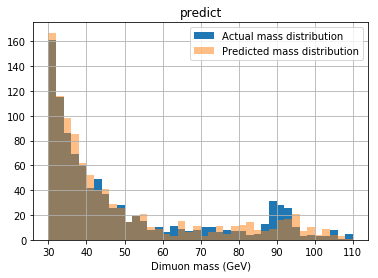

In [313]:
fig = plt.figure()

ax = fig.add_subplot(111)

test['M'].as_data_frame().hist(bins=range(30,111,2), ax=ax, label='Actual mass distribution')
aml.leader.predict(test).as_data_frame().hist(bins=range(30,111,2), ax=ax, alpha=0.5, label='Predicted mass distribution')
ax.set_xlabel('Dimuon mass (GeV)')
plt.legend()